<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Spaceship TITANIC

In [50]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import cv,CatBoostClassifier,Pool
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('train (1).csv')
test=pd.read_csv('test (2).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:>

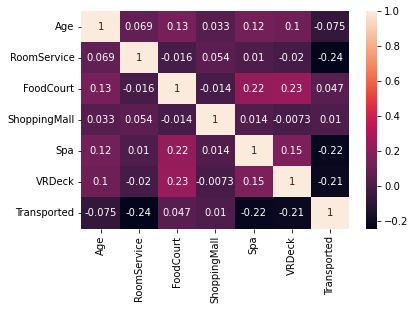

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


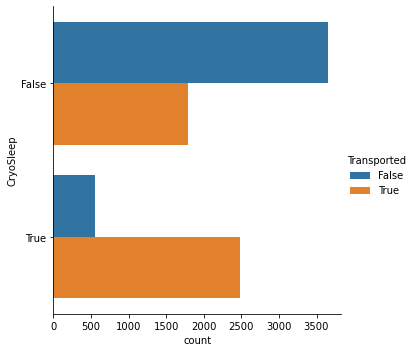

In [9]:
sns.catplot(y='CryoSleep',hue='Transported',data=df,kind='count')

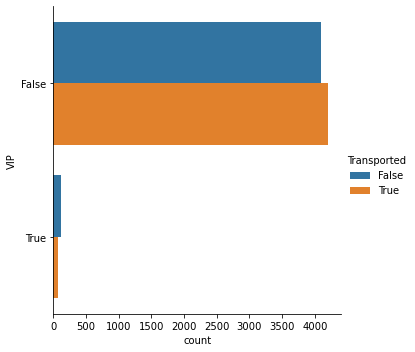

In [11]:
sns.catplot(y='VIP',hue='Transported',data=df,kind='count')

In [18]:
df[df['CryoSleep'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


In [19]:
cat_features=['HomePlanet','CryoSleep','Destination','VIP',]
drop_features=['PassengerId','Cabin','Name']

In [21]:
df=df.drop(drop_features,axis=1)
test=test.drop(drop_features,axis=1)

In [23]:
df[cat_features]=df[cat_features].fillna('unknown')
test[cat_features]=test[cat_features].fillna('unknown')

In [25]:
df['Transported']=df['Transported']*1

In [26]:
train=df.drop('Transported',axis=1)

In [27]:
target=df['Transported']

In [28]:
X_train,X_valid,y_train,y_valid=train_test_split(train,target,test_size=0.20,random_state=123)

In [32]:
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )

In [34]:
test_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_features
                 )

In [74]:
params = {'cat_features': cat_features,
              'eval_metric': 'Accuracy',
          'loss_function': 'Logloss',
              'learning_rate': 0.1,
              'random_seed': 2007,
              'verbose':200}

In [75]:
cv_data = cv(
    params = params,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    early_stopping_rounds=200
)

Training on fold [0/5]

bestTest = 0.7929547088
bestIteration = 129

Training on fold [1/5]

bestTest = 0.7987059669
bestIteration = 230

Training on fold [2/5]

bestTest = 0.7951114306
bestIteration = 268

Training on fold [3/5]

bestTest = 0.8001437815
bestIteration = 199

Training on fold [4/5]

bestTest = 0.8122302158
bestIteration = 268



In [76]:
cv_data

,iterations,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.743171,0.012293,0.746656,0.009368,0.653294,0.006311,0.652829,0.005371
1,1,0.764742,0.009172,0.765962,0.010236,0.617955,0.010353,0.617140,0.008263
2,2,0.768910,0.006885,0.774770,0.006687,0.588868,0.007855,0.586694,0.005808
3,3,0.767759,0.004748,0.776640,0.007239,0.567504,0.007898,0.564859,0.004902
4,4,0.762009,0.010994,0.772900,0.005755,0.551243,0.009634,0.548216,0.004806
...,...,...,...,...,...,...,...,...,...
464,464,0.791057,0.008662,0.869859,0.004888,0.439275,0.016603,0.307369,0.008432
465,465,0.791057,0.008662,0.869895,0.004940,0.439286,0.016616,0.307310,0.008497
466,466,0.791057,0.008662,0.869895,0.004940,0.439313,0.016625,0.307189,0.008612
467,467,0.791201,0.008910,0.869859,0.004888,0.439396,0.016531,0.307113,0.008694


In [77]:
cv_data[cv_data['test-Accuracy-mean'] == cv_data['test-Accuracy-mean'].max()]

,iterations,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
230,230,0.797241,0.008193,0.842033,0.004187,0.433727,0.016859,0.352613,0.003309


In [78]:
params = {'cat_features': cat_features,
              'eval_metric': 'Accuracy',
          'loss_function': 'Logloss',
              'learning_rate': 0.1,
              'random_seed': 2007,
          'iterations':230,
              'verbose':100}

In [79]:
model=CatBoostClassifier(**params)

In [80]:
model.fit(train_data,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7628703	total: 26.6ms	remaining: 6.08s
100:	learn: 0.8142077	total: 2.03s	remaining: 2.59s
200:	learn: 0.8307449	total: 3.93s	remaining: 568ms
229:	learn: 0.8346276	total: 4.51s	remaining: 0us


In [81]:
pred = model.predict(X_valid)

In [82]:
accuracy_score(y_valid,pred)

0.8067855089131685

In [83]:
full_data = Pool(data=train,label=target,cat_features=cat_features)

In [84]:
model.fit(full_data)

0:	learn: 0.7774071	total: 28.1ms	remaining: 6.43s
100:	learn: 0.8099620	total: 1.98s	remaining: 2.52s
200:	learn: 0.8272173	total: 3.92s	remaining: 566ms
229:	learn: 0.8298631	total: 4.62s	remaining: 0us


In [85]:
predict_test=model.predict(test)

In [86]:
test_2=pd.read_csv('test (2).csv')

In [87]:
final=pd.DataFrame({'PassengerId':test_2['PassengerId'],
                 'Transported':predict_test}).set_index('PassengerId')

In [88]:
final['Transported']=final['Transported'].astype('bool')

In [89]:
final

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [90]:
final.to_csv('first.csv')